# Ejercicio 6

![Consigna](img/ej6_consigna.JPG)

$\displaystyle s_1(t) = A_0 + A_1 . \cos(\omega_1.t) = 1V+0,5V.\cos(2\pi.5MHz.t)$

$\displaystyle s_2(t) = (2.A_2) . \cos(\omega_2.t) = 1V.\cos(2\pi.2MHz.t)$

## a)

$\displaystyle S_3(f) = |S_1(f)*S_2(f)|$

$\displaystyle S_1(f) = A_0 . \delta(f) + \frac{A_1}{2} . (\delta(f-f_1)+\delta(f+f_1))$

$\displaystyle S_2(f) = (2.A_2) . (\delta(f-f_2)+\delta(f+f_2))$

$\displaystyle S_3(f) = \frac{A_1.(2.A_2)}{2} . (\delta_{(f-f_1-f_2)} + \delta_{(f-f_1+f_2)} + \delta_{(f+f_1-f_2)} + \delta_{(f+f_1+f_2)}) + A_0.(2.A_2) . (\delta_{(f-f_2)} + \delta_{(f+f_2)})$

$\displaystyle S_3(f) = \frac{1}{4} . (\delta_{(f-7MHz)} + \delta_{(f-3MHz)} + \delta_{(f+3MHz)} + \delta_{(f+7MHz)}) + 1 . (\delta_{(f-2MHz)} + \delta_{(f+2MHz)})$

## b)

Considerando que $S_3(f)$ es la convolución entre $S_1(f)$ y $S_2(f)$, la convolución en frecuencia se traduce como una multiplicación en el tiempo:

$\displaystyle s_3(t) = s_1(t) . s_2(t)$

$\displaystyle s_1(t) = 1V+0,5V.\cos(2\pi.5MHz.t)$

$\displaystyle s_2(t) = 1V.\cos(2\pi.2MHz.t)$

$\displaystyle s_3(t) = (1V+0,5V.\cos(2\pi.5MHz.t)) . (1V.\cos(2\pi.2MHz.t))$

$\displaystyle s_3(t) = 1V^2.\cos(2\pi.2MHz.t)+0,5V^2.\cos(2\pi.5MHz.t).\cos(2\pi.2MHz.t)$

Recordando que:

$\displaystyle \cos(a).\cos(b)=\frac{1}{2}.(\cos(a-b)+\cos(a+b))$

La expresión queda:

$\displaystyle s_3(t) = 1V^2.\cos(2\pi.2MHz.t)+0,25V^2.(\cos(2\pi.3MHz.t)+\cos(2\pi.7MHz.t))$

## c)

Para calcular la potencia normalizada de $s_1(t)$:

$\displaystyle \langle s_1^2(t)\rangle = 2.\left(\frac{A_1}{2}\right)^2+(A_0)^2 = 2.(0,25)^2+1 = 1,125$

## d)

Para calcular la potencia normalizada de $s_3(t)$:

$\displaystyle \langle s_3^2(t)\rangle = 4.\left(\frac{A_1.(2.A_2)}{2}\right)^2+2.(A_0.(2.A_2))^2 = 4.(0,25)^2+2.(0,5)^2 = 0,75$

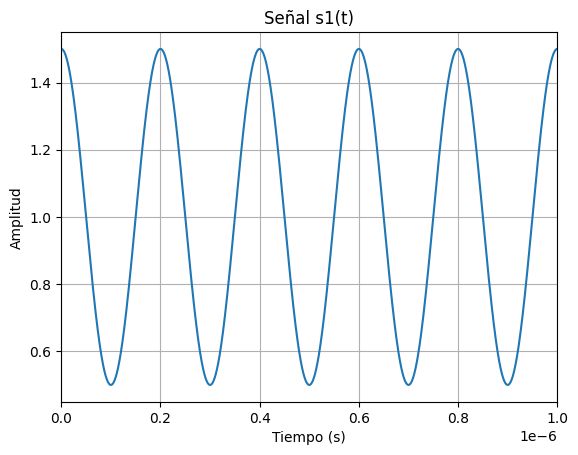

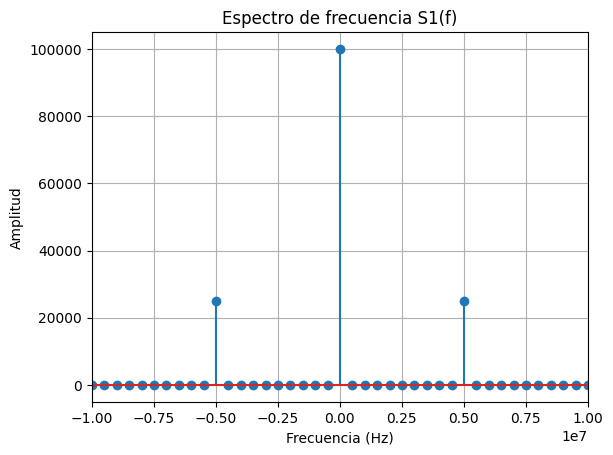

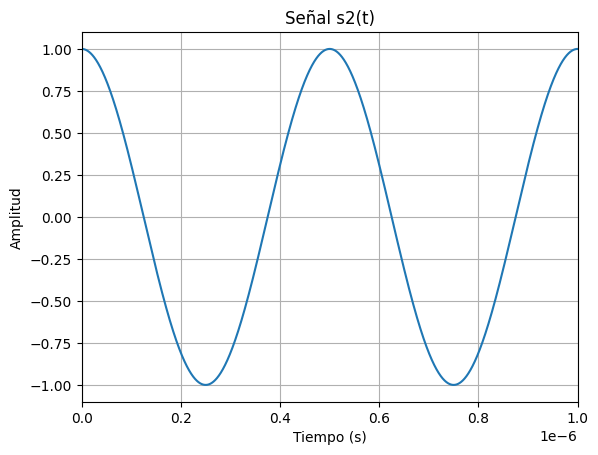

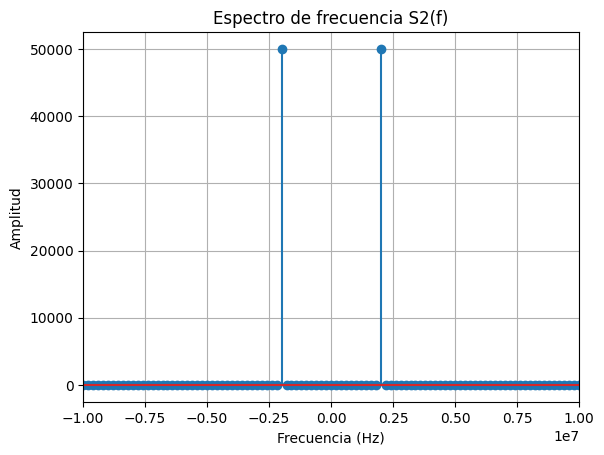

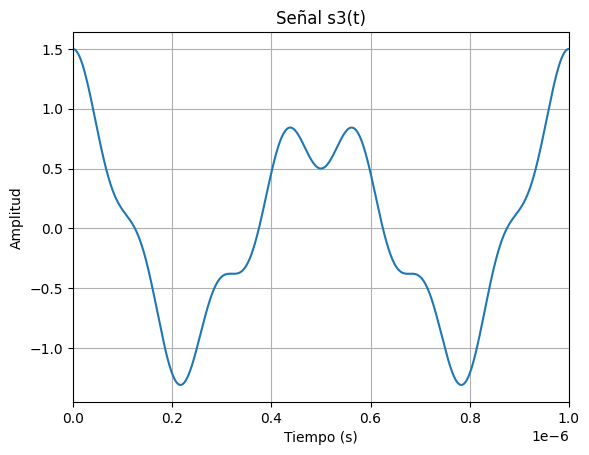

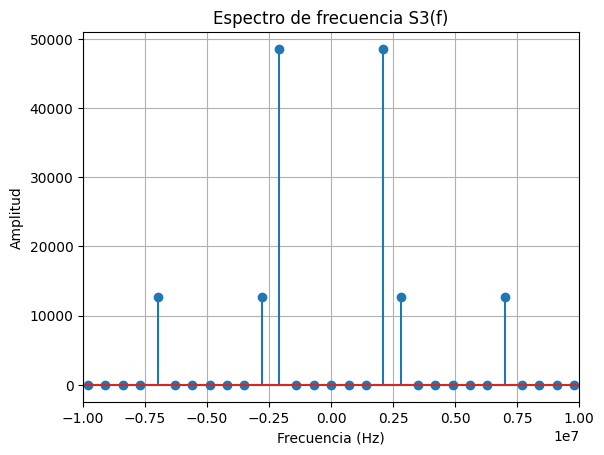

In [2]:
import matplotlib.pyplot as plt
import numpy as np

M = 10000        # Cantidad de muestras por periodo

## Señal s1
# Definimos las constantes de s1
A0 = 1          # Amplitud de la componente continua
A1 = 0.5        # Amplitud de la componente cosenoidal
f1 = 5e6        # Frecuencia de la señal
w1 = 2*np.pi*f1 # Frecuencia angular de la señal
T1 = 1/f1       # Periodo de la señal s1

# Vector de tiempo de la señal s1
t1 = np.linspace(0, 10*T1, 10*M)

# Creamos el vector de frecuencias para S1
freq1 = np.fft.fftfreq(len(t1), t1[1] - t1[0])

# Creamos el vector de la señal s1
s1 = A0 + A1 * np.cos(w1*t1)

# Calculamos la transformada de Fourier y su espectro de amplitudes
# para la señal s1
S1 = np.fft.fft(s1)
S1_amp = np.abs(S1)

## Señal s2
# Definimos las constantes de s2
A2 = 0.5        # Amplitud de la componente cosenoidal
f2 = 2e6        # Frecuencia de la señal
w2 = 2*np.pi*f2 # Frecuencia angular de la señal
T2 = 1/f2       # Periodo de la señal s2

# Vector de tiempo de la señal s2
t2 = np.linspace(0, 10*T2, 10*M)

# Creamos el vector de frecuencias para S2
freq2 = np.fft.fftfreq(len(t2), t2[1] - t2[0])

# Creamos el vector de la señal s2
s2 = 2*A2*np.cos(w2*t2)

# Calculamos la transformada de Fourier y su espectro de amplitudes
# para la señal s2
S2 = np.fft.fft(s2)
S2_amp = np.abs(S2)

## Señal 3
# Vector de tiempo de la señal s3
T3 = 1/(f1+f2)  # Periodo de la señal s3
t3 = np.linspace(0, 10*T3, 10*M)

# Creamos el vector de frecuencias para S3
freq3 = np.fft.fftfreq(len(t3), t3[1] - t3[0])

# Creamos el vector de la señal s3
s3 = 2 * A2 * (A0 * np.cos(w2*t3) + A1 * (1/2) * (np.cos(2*np.pi*(f1-f2)*t3)+np.cos(2*np.pi*(f1+f2)*t3)))

# Calculamos la transformada de Fourier y su espectro de amplitudes
# para la señal s2
S3 = np.fft.fft(s3)
S3_amp = np.abs(S3)

for i in range(len(freq3)):
    if np.abs(S3_amp[i]) < 10000:
        S3_amp[i] = 0

plt.figure()
plt.plot(t1,s1)
plt.xlim(0,1e-6)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal s1(t)')
plt.grid(True)

plt.figure()
plt.stem(freq1, S1_amp)
plt.xlim(-1e7,1e7)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia S1(f)')
plt.grid(True)

plt.figure()
plt.plot(t2,s2)
plt.xlim(0,1e-6)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal s2(t)')
plt.grid(True)

plt.figure()
plt.stem(freq2, S2_amp)
plt.xlim(-1e7,1e7)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia S2(f)')
plt.grid(True)

plt.figure()
plt.plot(t3,s3)
plt.xlim(0,1e-6)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal s3(t)')
plt.grid(True)

plt.figure()
plt.stem(freq3, S3_amp)
plt.xlim(-1e7,1e7)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia S3(f)')
plt.grid(True)

plt.show()
